In [39]:
# Directory of fruits
import os
directory_path = os.getcwd()
print("My current directory is : " + directory_path)
# define the train and test images path
train_dir = directory_path + '\\inputimages\\train\\'
test_dir = directory_path + '\\inputimages\\test\\'

My current directory is : C:\Users\user\JupyterNotebook\projFruitImagesClassification


In [40]:
# list the image file(s)
for dirname, _, filenames in os.walk(test_dir):
    for filename in filenames:
        if filename.split(".")[-1] == "txt": 
            continue
        print(os.path.join(dirname, filename))

C:\Users\user\JupyterNotebook\projFruitImagesClassification\inputimages\test\apple\image_224 (2).jpg
C:\Users\user\JupyterNotebook\projFruitImagesClassification\inputimages\test\apple\image_328.jpg
C:\Users\user\JupyterNotebook\projFruitImagesClassification\inputimages\test\apple\image_330.jpg
C:\Users\user\JupyterNotebook\projFruitImagesClassification\inputimages\test\apple\image_332.jpg
C:\Users\user\JupyterNotebook\projFruitImagesClassification\inputimages\test\apple\image_333.jpg
C:\Users\user\JupyterNotebook\projFruitImagesClassification\inputimages\test\apple\image_334.jpg
C:\Users\user\JupyterNotebook\projFruitImagesClassification\inputimages\test\apple\image_335.jpg
C:\Users\user\JupyterNotebook\projFruitImagesClassification\inputimages\test\apple\image_336.jpg
C:\Users\user\JupyterNotebook\projFruitImagesClassification\inputimages\test\apple\image_337.jpg
C:\Users\user\JupyterNotebook\projFruitImagesClassification\inputimages\test\apple\image_338.jpg
C:\Users\user\JupyterNoteb

In [41]:
fruits_name = []
fruits_image = []
fruits_dir = []
i = 0
for subdir in os.listdir(train_dir):
    fruits_dir.append(i) # name of the fruit i.e. label
    i += 1
    for image_filename in os.listdir(train_dir + subdir):
        if image_filename.split(".")[-1] == "txt":
            continue
        fruits_name.append(subdir) # name of the fruit 
        fruits_image.append(subdir + '/' + image_filename) # image of the fruit

In [42]:
import pandas as pd # data processing, CSV file I/O
train_fruits = pd.DataFrame(fruits_name, columns=["Fruits"])
train_fruits["Fruits Image"] = fruits_image

In [43]:
train_fruits

,Fruits,Fruits Image
0,apple,apple/image_0.jpg
1,apple,apple/image_10.jpg
2,apple,apple/image_101.jpg
3,apple,apple/image_102.jpg
4,apple,apple/image_103.jpg
...,...,...
1495,strawberry,strawberry/image_456.jpg
1496,strawberry,strawberry/image_457.jpg
1497,strawberry,strawberry/image_458.jpg
1498,strawberry,strawberry/image_459.jpg


In [44]:
# count for each fruit
from collections import Counter
# newData is a dictionary
newData = Counter(train_fruits["Fruits"])
print("Found fruits in the data set and their corresponding count of image(s)")
# newData is dictionary
# newData2 is list of tuple 
newData2 = newData.most_common()
newData2

Found fruits in the data set and their corresponding count of image(s)


[('apple', 300),
 ('banana', 300),
 ('mango', 300),
 ('orange', 300),
 ('strawberry', 300)]

In [45]:
# list each fruit
x,y = zip(*newData2)
x,y = list(x),list(y)
print("Found fruits in the dataset -- > \n ", x)

Found fruits in the dataset -- > 
  ['apple', 'banana', 'mango', 'orange', 'strawberry']


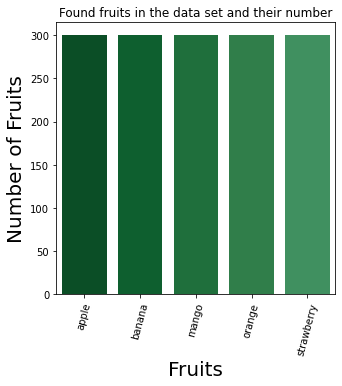

In [46]:
# plot graphic for each fruit
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,5))
ax= sns.barplot(x=x, y=y, palette=sns.color_palette("BuGn_r", 15)) 
plt.xlabel('Fruits', size = 20) 
plt.ylabel('Number of Fruits', size = 20 )
plt.xticks(rotation = 75)
plt.title('Found fruits in the data set and their number') 
plt.show()

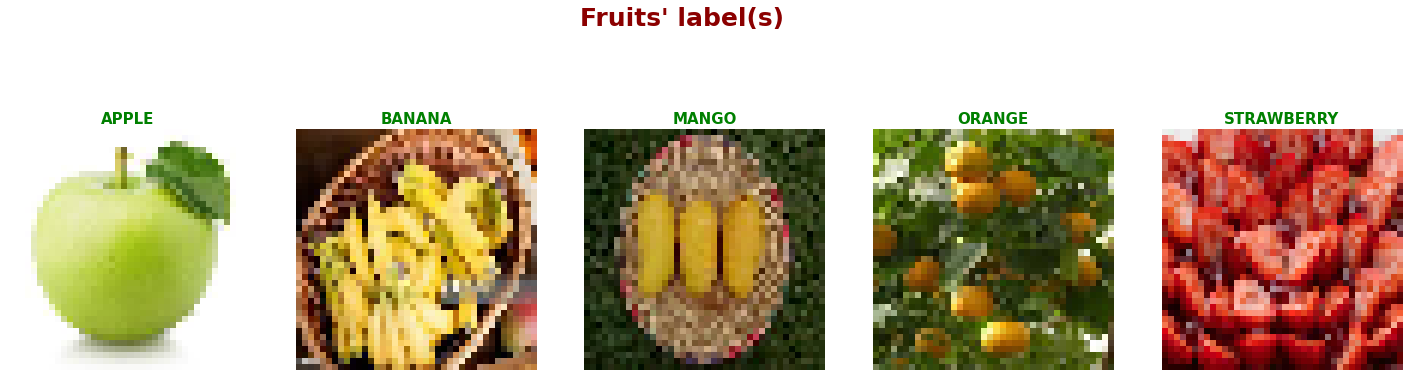

In [47]:
import cv2
from tensorflow.keras.utils import load_img
plt.figure(figsize=(25,16))
how_many_fruits = len(x)

for i in range(how_many_fruits):
    fruits = train_fruits[train_fruits["Fruits"] == x[i]]["Fruits Image"].values [1]    
    plt.subplot(3,5,i+1)
    img = load_img(train_dir + fruits, target_size=(40, 40))    
    plt.imshow(img)
    plt.title(x[i].upper(), color = "green", fontsize = 15 , fontweight = 600)
    plt.axis("off")

plt.suptitle("Fruits' label(s)", fontsize = 25 , color = "darkred", fontweight = 'bold')
plt.show()

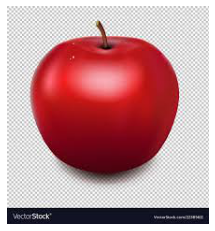

In [48]:
# open an image
img = load_img(train_dir + "/apple/image_19.jpg")
plt.imshow(img)
plt.axis("off")
plt.show()

In [49]:
# what is the shape of image?
from tensorflow.keras.utils import img_to_array
array_image = img_to_array(img)
print("Image Shape --> ", array_image.shape)

Image Shape -->  (233, 216, 3)


In [50]:
# show how many type(s) of fruit
from glob import glob
fruitCountUnique = glob(train_dir + '/*' )
numberOfClass = len(fruitCountUnique)
print("How many different fruits are there  -->  ", numberOfClass)

How many different fruits are there  -->   5


In [51]:
# import model 
import tensorflow as tf 
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense

#import warnings
import warnings
warnings.filterwarnings('ignore')
model = Sequential()
# convolution layer (1 st)
model.add(Conv2D(
    filters=32,
    kernel_size = (5,5),
    input_shape = (40, 40, 3),
    activation = 'relu'))
# pooling layer (1st)
model.add(MaxPooling2D(pool_size=(2,2)))

# convolution layer (2nd)
model.add(Conv2D(
    filters=32,
    kernel_size = (5,5),
    activation = 'relu'))
# pooling layer (2nd)
model.add(MaxPooling2D(pool_size=(2,2)))

# convlution layer (3rd)
model.add(Conv2D(
    filters=64,
    kernel_size = (5,5),
    activation = 'relu'))
# pooling layer (3rd)
model.add(MaxPooling2D())
# flatten layer
model.add(Flatten())
# Dense layer
model.add(Dense(units=512, activation='relu'))
# dropout layer
model.add(Dropout(0.2))
# output layer
model.add(Dense(units=numberOfClass, activation='softmax')) 

In [52]:
model.compile(loss = "categorical_crossentropy",
              optimizer = "rmsprop",
              metrics = ["accuracy"])

In [64]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 36, 36, 32)        2432      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 18, 18, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 32)        25632     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 3, 3, 64)          51264     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 1, 1, 64)        

In [53]:
# number of training
epochs = 100  
# get 32 per training
batch_size = 32

In [ ]:
print("Target Size --> ", array_image.shape[:2])

In [54]:
array_image.shape

(233, 216, 3)

In [55]:

# normalize from 0~255 to 0~1
train_datagen = ImageDataGenerator(rescale= 1./255,
                   shear_range = 0.3,
                   horizontal_flip=True,
                   zoom_range = 0.3)

test_datagen = ImageDataGenerator(rescale=1./255)

In [56]:

train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size = (40, 40),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

Found 1500 images belonging to 5 classes.


In [57]:

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size = (40, 40),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

Found 500 images belonging to 5 classes.


In [58]:
# get the shape from train_generator
for data_batch, labels_batch in train_generator:
    print("data_batch shape --> ",data_batch.shape)
    print("labels_batch shape --> ",labels_batch.shape)
    break

data_batch shape -->  (32, 40, 40, 3)
labels_batch shape -->  (32, 5)


In [59]:
hist = model.fit_generator(
        generator = train_generator,
        steps_per_epoch = (train_generator.samples) // batch_size,
        epochs=epochs,
        validation_data = test_generator,
        validation_steps = (test_generator.samples) // batch_size)
model.save('model.h5')

Epoch 1/100
46/46 [==============================] - 4s 73ms/step - loss: 1.5933 - accuracy: 0.2371 - val_loss: 1.4756 - val_accuracy: 0.3042
Epoch 2/100
46/46 [==============================] - 3s 69ms/step - loss: 1.4494 - accuracy: 0.3397 - val_loss: 1.4597 - val_accuracy: 0.3646
Epoch 3/100
46/46 [==============================] - 3s 69ms/step - loss: 1.3881 - accuracy: 0.3774 - val_loss: 1.4368 - val_accuracy: 0.3729
Epoch 4/100
46/46 [==============================] - 3s 69ms/step - loss: 1.3516 - accuracy: 0.3931 - val_loss: 1.2980 - val_accuracy: 0.4083
Epoch 5/100
46/46 [==============================] - 3s 68ms/step - loss: 1.3132 - accuracy: 0.4080 - val_loss: 1.2858 - val_accuracy: 0.4187
Epoch 6/100
46/46 [==============================] - 3s 69ms/step - loss: 1.2898 - accuracy: 0.4339 - val_loss: 1.2960 - val_accuracy: 0.4396
Epoch 7/100
46/46 [==============================] - 3s 69ms/step - loss: 1.2500 - accuracy: 0.4475 - val_loss: 1.2201 - val_accuracy: 0.5063
Epoch 

46/46 [==============================] - 3s 68ms/step - loss: 0.3878 - accuracy: 0.8474 - val_loss: 2.0993 - val_accuracy: 0.5188
Epoch 59/100
46/46 [==============================] - 3s 69ms/step - loss: 0.3888 - accuracy: 0.8515 - val_loss: 1.8122 - val_accuracy: 0.5458
Epoch 60/100
46/46 [==============================] - 3s 73ms/step - loss: 0.4061 - accuracy: 0.8481 - val_loss: 1.9877 - val_accuracy: 0.5354
Epoch 61/100
46/46 [==============================] - 3s 68ms/step - loss: 0.3660 - accuracy: 0.8556 - val_loss: 1.8847 - val_accuracy: 0.5708
Epoch 62/100
46/46 [==============================] - 3s 69ms/step - loss: 0.3712 - accuracy: 0.8610 - val_loss: 2.1247 - val_accuracy: 0.5000
Epoch 63/100
46/46 [==============================] - 3s 69ms/step - loss: 0.3847 - accuracy: 0.8542 - val_loss: 1.9548 - val_accuracy: 0.5729
Epoch 64/100
46/46 [==============================] - 3s 67ms/step - loss: 0.3875 - accuracy: 0.8624 - val_loss: 2.2044 - val_accuracy: 0.5625
Epoch 65/100

In [60]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

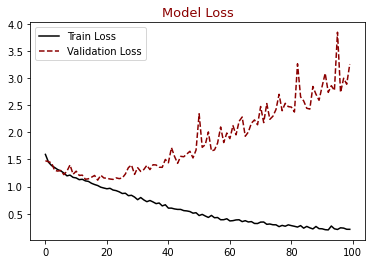

In [61]:
plt.figure()
plt.plot(hist.history["loss"],label = "Train Loss", color = "black")
plt.plot(hist.history["val_loss"],label = "Validation Loss", color = "darkred", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Loss", color = "darkred", size = 13)
plt.legend()
plt.show()

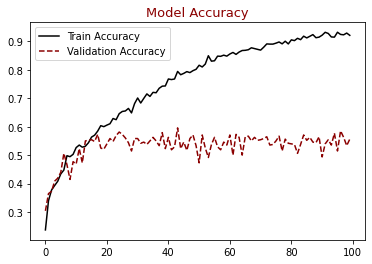

In [62]:
plt.figure()
plt.plot(hist.history["accuracy"],label = "Train Accuracy", color = "black")
plt.plot(hist.history["val_accuracy"],label = "Validation Accuracy", color = "darkred", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Accuracy", color = "darkred", size = 13)
plt.legend()
plt.show()